<a href="https://colab.research.google.com/github/Anurag943/Generative-Deep-Learning-Book/blob/main/Chapter_2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
from tensorflow.keras import datasets, utils



In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [ ]:
print(y_train
      )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, softmax

model = models.Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(units=200, activation = 'relu'),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle=True,
          )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.2906 - loss: 1.9661
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4006 - loss: 1.6806
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.4280 - loss: 1.5985
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4544 - loss: 1.5313
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4668 - loss: 1.4955
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.4816 - loss: 1.4620
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.4903 - loss: 1.4306
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4992 - loss: 1.4090
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.5111 - loss: 1.3789
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5174 - loss: 1.3577


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4803 - loss: 1.4503


[1.448287844657898, 0.4837999939918518]

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                    'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


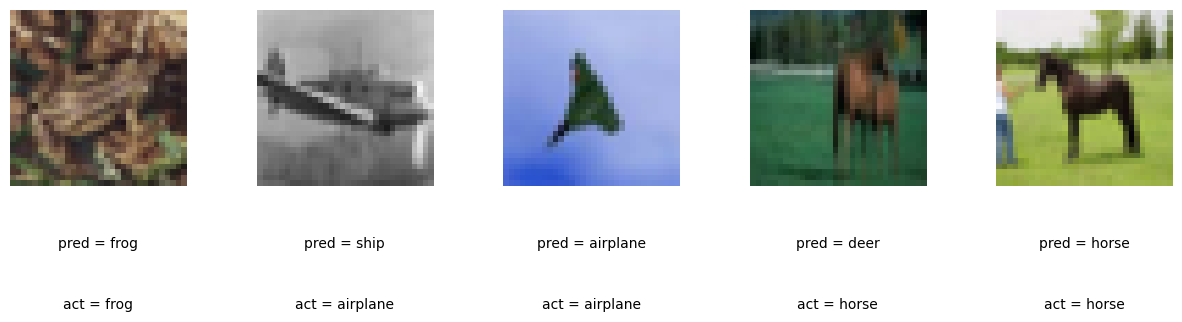

In [ ]:
import matplotlib.pyplot as plt

n_to_show=5
indices = np.random.choice(range(len(x_test)), n_to_show)

fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = '+str(preds[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)
plt.show()

# Convolutional Neural **Network**

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_layer = layers.Input(shape=(64, 64, 1))
conv_layer_1 = layers.Conv2D(
    filters = 2,
    kernel_size = (3, 3),
    strides = 1,
    padding = 'same',
)(input_layer)

In [ ]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
conv_layer_1 = layers.Conv2D(
    filters = 10,
    kernel_size = (4, 4),
    strides = 2,
    padding = 'same',
)(input_layer)

conv_layer_2 = layers.Conv2D(
    filters = 20,
    kernel_size = (3, 3),
    strides = 2,
    padding = 'same',
)(conv_layer_1)

flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation='softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 10)          │             490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 20)            │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers
layers.BatchNormalization(momentum=0.9)

<BatchNormalization name=batch_normalization, built=False>

In [ ]:
from tensorflow.keras import layers
layers.Dropout(rate=0.25)

<Dropout name=dropout, built=False>

In [ ]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters = 32, kernel_size =3,
                  strides = 1, padding='same')(input_layer)

x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3,
                  strides = 2 , padding='same')(x)
x =layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size=2, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(units=128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)

model1 = models.Model(input_layer, output_layer)


In [ ]:
model1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,2

 Total params: 582,314 (2.22 MB)

 Trainable params: 581,674 (2.22 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate= 0.0005)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model1.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle=True,
          )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 80ms/step - accuracy: 0.3878 - loss: 1.7991
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.5809 - loss: 1.1830
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.6454 - loss: 1.0227
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.6724 - loss: 0.9371
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6949 - loss: 0.8738
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.7161 - loss: 0.8214
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 80ms/step - accuracy: 0.7306 - loss: 0.7703
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 80ms/step - accuracy: 0.7445 - loss: 0.7354
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.7544 - loss: 0.6932
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - accuracy: 0.7695 - loss: 0.6624


In [ ]:
model1.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 555ms/step - accuracy: 0.7024 - loss: 0.8658
